In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from prophet import Prophet

mae: 182.7483637490004
RMSE: 222.14039897814231


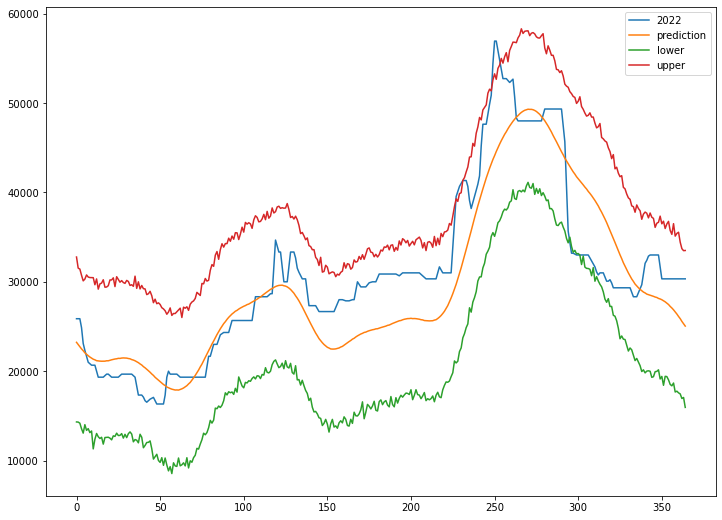

In [6]:
# df = pd.read_csv('se_당근_het.csv',encoding='cp949')

# df['ds'] = pd.to_datetime(df['ds'])

# test_df = pd.read_csv('22_가격동향_당근.csv',encoding='utf-8')
# test_df = test_df['서울\n단위 (원)']
# test_df = test_df.interpolate(method='linear')
# test_df = test_df.fillna(method='bfill')

# test_df['일자'] = test_df['일자'].apply(lambda x: pd.to_datetime(str(x),format='%Y-%m-%d'))
# con_2022 = test_df[['일자','서울\n단위 (원)']].copy()
# con_2022.rename(columns = {'일자' : 'ds','서울\n단위 (원)' : 'y'}, inplace = True)
# df = pd.concat([df,con_2022]).reset_index(drop=True)
# df.to_csv('train/+22년se당근_het.csv',encoding='cp949',index=False)

df = pd.read_csv('+22년se당근_het.csv',encoding='cp949')
df['ds'] = pd.to_datetime(df['ds'])
test_df = df['y'].tail(365).reset_index(drop=True)

df['cap'] = (df['y'].max()*2)
df['floor'] = (df['y'].min()/2)
model_het = Prophet(growth='logistic',
    n_changepoints=25,
    changepoint_prior_scale=0.022,
    seasonality_prior_scale=10,
    #seasonality_mode='additive',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    daily_seasonality=True,)
model_het.fit(df)

future = model_het.make_future_dataframe(periods=365)
future['cap'] = (df['y'].max()*2)
future['floor'] = (df['y'].min()/2)

forecast = model_het.predict(future)
pred_het = forecast['yhat'].tail(365).reset_index(drop=True)
lower = forecast['yhat_lower'].tail(365).reset_index(drop=True)
upper = forecast['yhat_upper'].tail(365).reset_index(drop=True)


from sklearn.metrics import mean_absolute_error
print('mae:',mean_absolute_error(test_df, pred_het))
print('RMSE:', mean_squared_error(test_df, pred_het)**0.5)
# 모델 저장 코드
# import joblib
# joblib.dump(model_het, 'model/se_당근_prophet20.pkl')

#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(df['y'].tail(365).reset_index(drop=True), label = '2022')
plt.plot(pred_het, label = 'prediction')
plt.plot(lower, label = 'lower')
plt.plot(upper, label = 'upper')
plt.legend()
plt.show()

In [4]:
#모델 불러와서 테스트
import joblib

loaded_model = joblib.load('se_당근_prophet20.pkl')

future = loaded_model.make_future_dataframe(periods=365)
future['cap'] = (113860)
future['floor'] = (8165)

future1 = future[-365:-365+7].copy().reset_index(drop=True)

forecast = loaded_model.predict(future1)

forecast['yhat']
# forecast['yhat_lower']
# forecast['yhat_upper']

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


0    31479.739902
1    31206.676570
2    30944.063614
3    30670.664672
4    30455.260461
5    30188.137342
6    30014.442643
Name: yhat, dtype: float64

In [54]:
future = loaded_model.make_future_dataframe(periods=365)
future['cap'] = (113860)
future['floor'] = (8165)

In [68]:
future1 = future[-365:-365+7].copy().reset_index(drop=True)

In [69]:
future1

,ds,cap,floor
0,2023-01-01,113860,8165
1,2023-01-02,113860,8165
2,2023-01-03,113860,8165
3,2023-01-04,113860,8165
4,2023-01-05,113860,8165
5,2023-01-06,113860,8165
6,2023-01-07,113860,8165


In [56]:
forecast = loaded_model.predict(future1)

In [57]:
pred_het.tail(365).reset_index(drop=True)

0      23230.184630
1      22978.270957
2      22738.966206
3      22492.654994
4      22291.147597
           ...     
360    26122.774732
361    25875.140451
362    25568.584292
363    25315.068968
364    25046.258406
Name: yhat, Length: 365, dtype: float64

In [62]:
forecast1['yhat'].tail(180)

2011    35569.955707
2012    35697.216759
2013    35753.888892
2014    35893.667270
2015    36030.632722
            ...     
2186    38507.233719
2187    38207.647373
2188    37819.086670
2189    37512.004437
2190    37199.008441
Name: yhat, Length: 180, dtype: float64

In [38]:
forecast['yhat']

0      25043.740602
1      25127.497164
2      25164.095788
3      25258.775451
4      25341.321651
           ...     
175    26122.774732
176    25875.140451
177    25568.584292
178    25315.068968
179    25046.258406
Name: yhat, Length: 180, dtype: float64

In [ ]:
#df = pd.read_csv('se_당근.csv',encoding='cp949')

In [ ]:
#df = pd.read_csv('se_당근_new.csv',encoding='cp949')

In [ ]:
#df = pd.read_csv('se_당근181920.csv',encoding='cp949')

In [ ]:
#df = pd.read_csv('se_당근18192021.csv',encoding='cp949')

In [ ]:
#df = pd.read_csv('se_당근14~20.csv',encoding='cp949')

In [ ]:
#df = pd.read_csv('se_당근7d.csv',encoding='cp949')

In [ ]:
#df = pd.read_csv('se_당근1d.csv',encoding='cp949')

In [ ]:
#df = pd.read_csv('se_당근18~20_pattern.csv',encoding='cp949')

In [41]:
df = pd.read_csv('se_당근_ML.csv',encoding='cp949')

In [37]:
df = pd.read_csv('+22년se당근_het.csv',encoding='cp949')

In [42]:
df

,당근가격,수확시기,p365,year,month,day,365d
0,19670.0,0.0,1.0,2018,1,1,60465.0
1,19670.0,0.0,2.0,2018,1,2,61000.0
2,19170.0,0.0,3.0,2018,1,3,60330.0
3,19110.0,0.0,4.0,2018,1,4,60110.0
4,19080.0,0.0,5.0,2018,1,5,60000.0
...,...,...,...,...,...,...,...
1456,25610.0,1.0,361.0,2021,12,27,21670.0
1457,25730.0,1.0,362.0,2021,12,28,21670.0
1458,25840.0,1.0,363.0,2021,12,29,21670.0
1459,25880.0,1.0,364.0,2021,12,30,21670.0


In [226]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df[['당근가격']])
# df[['당근가격']] = scaler.transform(df[['당근가격']])
# df[['365d']] = scaler.transform(df[['365d']])

In [43]:
df.rename(columns={'당근가격':'y'},inplace=True)

In [44]:
x=df.drop(columns='y')
y=df['y']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, shuffle=False)

In [37]:
model_li = LinearRegression()
model_li.fit(train_x,train_y)
pred = model_li.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

LinearRegression()

In [39]:
model_rf = RandomForestRegressor(n_estimators=1000,max_depth=30,n_jobs=-1)
model_rf.fit(x,y)
pred = model_rf.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 444.26001642158735
0.99834


In [40]:
model_gb = ensemble.GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=10)
model_gb.fit(x,y)
pred = model_gb.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 0.21651497804188735
1.0


In [65]:
model_het = Prophet(
    n_changepoints=25,
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=10,
    seasonality_mode='multiflicative'
    yearly_seasonality==True,)
model_het.fit(df)

In [45]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
import tensorflow as tf

tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(6,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse']) 


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 6

In [46]:
import os
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'se_carrot_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x, y, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop, checkpoint])

Epoch 1/100
23/37 [=================>............] - ETA: 0s - loss: 25971.1133 - mse: 766254912.0000 
Epoch 1: val_loss improved from inf to 5341.76123, saving model to model\se_carrot_checkpoint.h5
37/37 [==============================] - 1s 11ms/step - loss: 23456.0059 - mse: 658244416.0000 - val_loss: 5341.7612 - val_mse: 46240208.0000
Epoch 2/100
22/37 [================>.............] - ETA: 0s - loss: 13098.5439 - mse: 273024992.0000
Epoch 2: val_loss did not improve from 5341.76123
37/37 [==============================] - 0s 4ms/step - loss: 12595.3994 - mse: 260055184.0000 - val_loss: 10262.2617 - val_mse: 143098944.0000
Epoch 3/100
22/37 [================>.............] - ETA: 0s - loss: 11849.0166 - mse: 231411440.0000
Epoch 3: val_loss did not improve from 5341.76123
37/37 [==============================] - 0s 4ms/step - loss: 11975.1426 - mse: 237340112.0000 - val_loss: 10981.7617 - val_mse: 161973392.0000
Epoch 4/100
20/37 [===============>..............] - ETA: 0s - loss:

In [53]:
model.load_weights(filename)
pred = model.predict(x_t)
print('mae:',mean_absolute_error(test_df/20, pred/20))
print('RMSE:', mean_squared_error(test_df/20, pred/20)**0.5)

12/12 [==============================] - 0s 2ms/step
mae: 893.6346626177226
RMSE: 1017.6705510193706


In [13]:
#test_y.reset_index(drop=True,inplace=True)

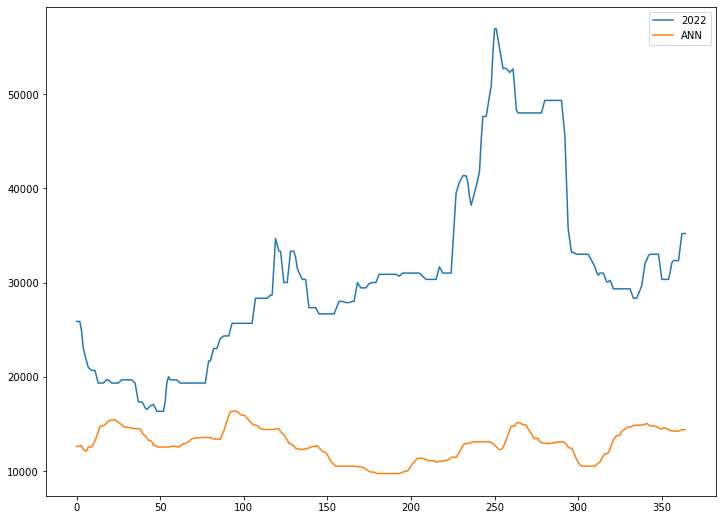

In [56]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df, label = '2022')
plt.plot(pred, label = 'ANN')
plt.legend()
plt.show()

In [ ]:
#아래쪽에 무수히 많은 시행착오들

In [ ]:
######################################################################################################

In [ ]:
######################################################################################################

In [ ]:
######################################################################################################

In [ ]:
######################################################################################################

In [ ]:
######################################################################################################

In [210]:
test_df = pd.read_csv('22_가격동향_당근.csv',encoding='utf-8')
test_df = test_df.interpolate(method='linear')
test_df = test_df.fillna(method='bfill')
test_df['일자'] = test_df['일자'].apply(lambda x: pd.to_datetime(str(x),format='%Y-%m-%d'))
con_2022 = test_df[['일자','서울\n단위 (원)']].copy()
con_2022.rename(columns = {'일자' : 'ds','서울\n단위 (원)' : 'y'}, inplace = True)
df = pd.concat([df,con_2022]).reset_index(drop=True)
df.to_csv('train/+22년se당근_het.csv',encoding='cp949',index=False)
df

,ds,y
0,2018-01-01,14330.0
1,2018-01-02,14330.0
2,2018-01-03,14330.0
3,2018-01-04,14330.0
4,2018-01-05,14330.0
...,...,...
1821,2022-12-27,29630.0
1822,2022-12-28,29630.0
1823,2022-12-29,29630.0
1824,2022-12-30,29630.0


In [10]:
test_df = pd.read_csv('22_가격동향_당근.csv',encoding='utf-8')
test_df = test_df.interpolate(method='linear')
test_df = test_df.fillna(method='bfill')
test_df['일자'] = test_df['일자'].apply(lambda x: pd.to_datetime(str(x),format='%Y-%m-%d'))

In [11]:
test_df = test_df['서울\n단위 (원)']

In [12]:
test_df

0      25870.0
1      25870.0
2      25870.0
3      24870.0
4      23100.0
        ...   
360    32330.0
361    33770.0
362    35200.0
363    35200.0
364    35200.0
Name: 서울\n단위 (원), Length: 365, dtype: float64

In [64]:
df2 = pd.read_csv("se_당근_구.csv",encoding='cp949')

In [69]:
x_t['365d'] = df2[-365:]['당근가격'].reset_index(drop=True)

In [47]:
x_t = x.copy()

In [48]:
x_t['365d'] = y

In [49]:
x_t['year'].replace(2021,2022,inplace=True)

In [50]:
x_t = x_t.tail(365)

In [51]:
x_t.reset_index(drop=True, inplace=True)

In [52]:
x_t#머신러닝 시계열 데이터 예측용으로 사용한 데이터

,수확시기,p365,year,month,day,365d
0,0.0,1.0,2022,1,1,22797.5
1,0.0,2.0,2022,1,2,22865.0
2,0.0,3.0,2022,1,3,22932.5
3,0.0,4.0,2022,1,4,23000.0
4,0.0,5.0,2022,1,5,22330.0
...,...,...,...,...,...,...
360,1.0,361.0,2022,12,27,25610.0
361,1.0,362.0,2022,12,28,25730.0
362,1.0,363.0,2022,12,29,25840.0
363,1.0,364.0,2022,12,30,25880.0


In [35]:
x_t.to_csv('22년서울당근test_x.csv',encoding='cp949',index=False)

In [ ]:
##############################################################################

In [13]:
test_df = pd.read_csv('22년서울당근.csv',encoding='cp949')

In [10]:
x_t = pd.read_csv('22년서울당근test_x.csv',encoding='cp949')

In [36]:
test_df = test_df['서울\n단위 (원)']

In [17]:
i = x_t['365d'].copy()
x_t.drop(columns=['김장철'],inplace=True)

In [49]:
x_t['pattern'] = x.loc[x['year']==2018]['pattern']

In [51]:
df = pd.concat([df,test_df[:180]])

In [52]:
df.reset_index(drop=True,inplace=True)

In [49]:
test_df.rename(columns = {'일자' : 'ds','서울\n단위 (원)' : 'y'}, inplace = True)

In [71]:
test_df.reset_index(drop=True, inplace=True)

In [63]:
test_df = test_df['y']

In [70]:
x_t

,수확시기,p365,year,month,day,365d
0,0.0,2.0,2022,1,2,22797.5
1,0.0,3.0,2022,1,3,22865.0
2,0.0,4.0,2022,1,4,22932.5
3,0.0,5.0,2022,1,5,23000.0
4,0.0,6.0,2022,1,6,22330.0
...,...,...,...,...,...,...
360,1.0,362.0,2022,12,27,25610.0
361,1.0,363.0,2022,12,28,25730.0
362,1.0,364.0,2022,12,29,25840.0
363,1.0,365.0,2022,12,30,25880.0


In [82]:
pred_rf = model_rf.predict(x_t)
print('mae:',mean_absolute_error(test_df/20, pred_rf/20))
print('RMSE:', mean_squared_error(test_df/20, pred_rf/20)**0.5)

mae: 369.3843821917809
RMSE: 461.0823600897932


In [83]:
pred_gb = model_gb.predict(x_t)
print('mae:',mean_absolute_error(test_df/20, pred_gb/20))
print('RMSE:', mean_squared_error(test_df/20, pred_gb/20)**0.5)

mae: 378.07224415516816
RMSE: 463.63906301755753


In [84]:
pred_li = model_li.predict(x_t)
print('mae:',mean_absolute_error(test_df/20, pred_li/20))
print('RMSE:', mean_squared_error(test_df/20, pred_li/20)**0.5)

mae: 197.68862061771836
RMSE: 259.973496451258


In [98]:
import joblib
joblib.dump(model_het, 'se_당근_prophet20.pkl')

['se_당근_prophet20.pkl']

In [211]:
df['cap'] = (df['y'].max()*2)
df['floor'] = (df['y'].min()/2)

In [212]:
model_het = Prophet(growth='logistic',
    n_changepoints=25,
    changepoint_prior_scale=0.022,
    seasonality_prior_scale=10,
    #seasonality_mode='additive',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    daily_seasonality=True,)
model_het.fit(df)

In [213]:
future = model_het.make_future_dataframe(periods=365)

In [214]:
future['cap'] = (df['y'].max()*2)
future['floor'] = (df['y'].min()/2)

In [215]:
forecast = model_het.predict(future)
pred_het = forecast['yhat'].tail(365).reset_index(drop=True)
from sklearn.metrics import mean_absolute_error
#print('mae:',mean_absolute_error(test_df/20, pred_het/20))
#print('RMSE:', mean_squared_error(test_df/20, pred_het/20)**0.5)

In [216]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

,ds,yhat,yhat_lower,yhat_upper
1826,2023-01-01,25484.159544,16623.240084,34463.663619
1827,2023-01-02,25281.361951,16490.373431,33125.400232
1828,2023-01-03,25068.389854,16278.660453,33329.555911
1829,2023-01-04,24821.977516,16656.318844,32783.836320
1830,2023-01-05,24635.873922,16051.676620,32768.820170
...,...,...,...,...
2186,2023-12-27,29746.678018,20833.670260,37975.151394
2187,2023-12-28,29474.721065,20539.882005,37918.790014
2188,2023-12-29,29209.340236,20454.760842,37665.655119
2189,2023-12-30,29022.933994,20312.082406,37570.912576


In [218]:
pred2023 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365).reset_index(drop=True).copy()
pred2023.to_csv('gw_당근_2023.csv',encoding='cp949',index=False)
import joblib
joblib.dump(model_het, 'model/gw_당근_prophet20.pkl')

['model/gw_당근_prophet20.pkl']

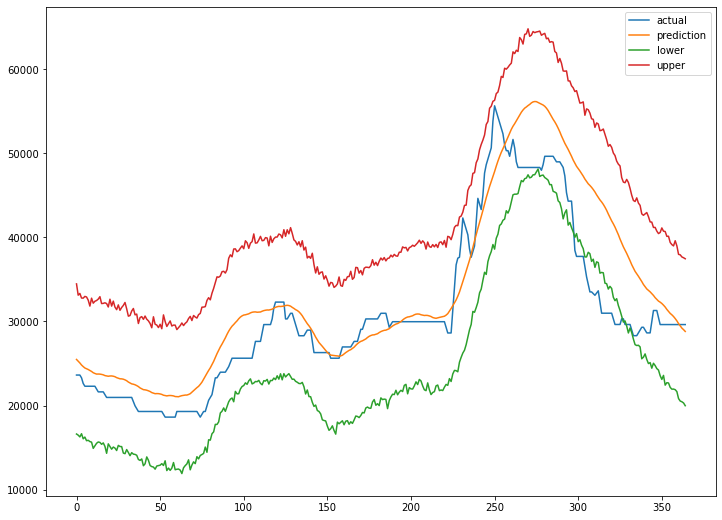

In [217]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df['서울\n단위 (원)'], label = 'actual')
plt.plot(pred_het, label = 'prediction')
plt.plot(forecast['yhat_lower'].tail(365).reset_index(drop=True), label = 'lower')
plt.plot(forecast['yhat_upper'].tail(365).reset_index(drop=True), label = 'upper')
plt.legend()
plt.show()

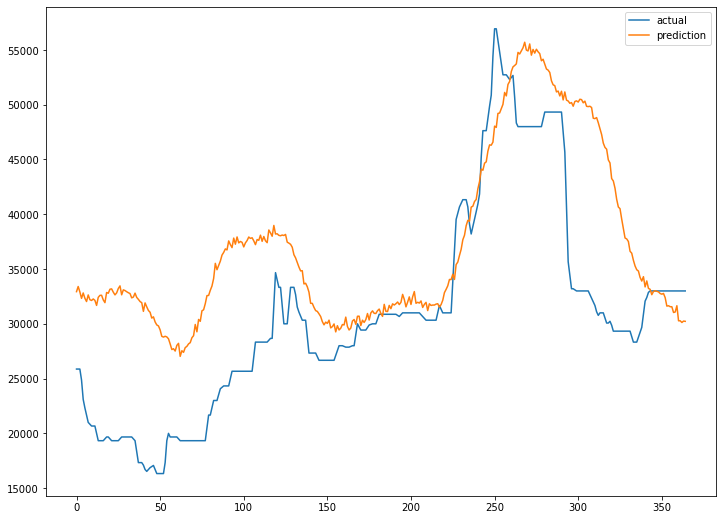

In [440]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df, label = 'actual')
plt.plot(pred_upper_het, label = 'prediction')
plt.legend()
plt.show()

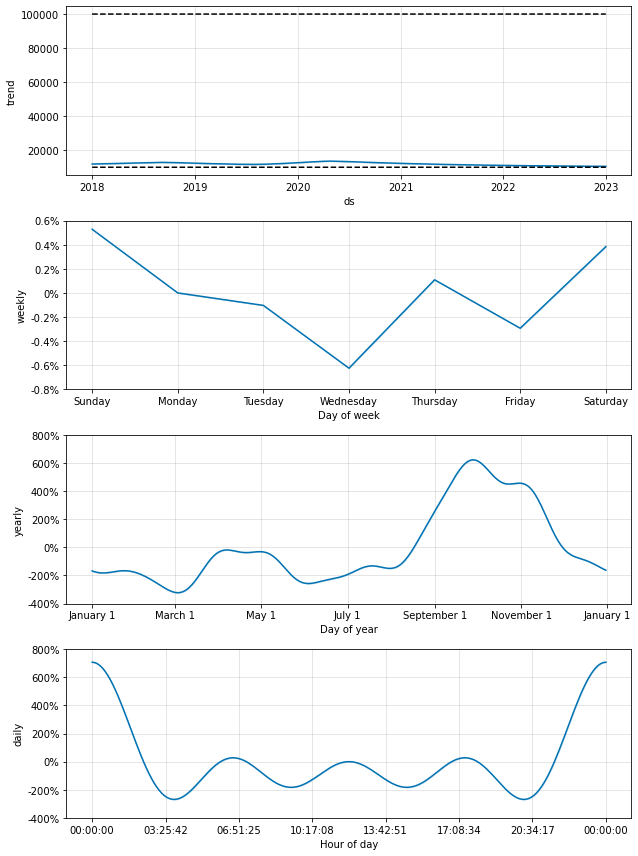

In [196]:
fig2 = model_het.plot_components(forecast)
plt.show()

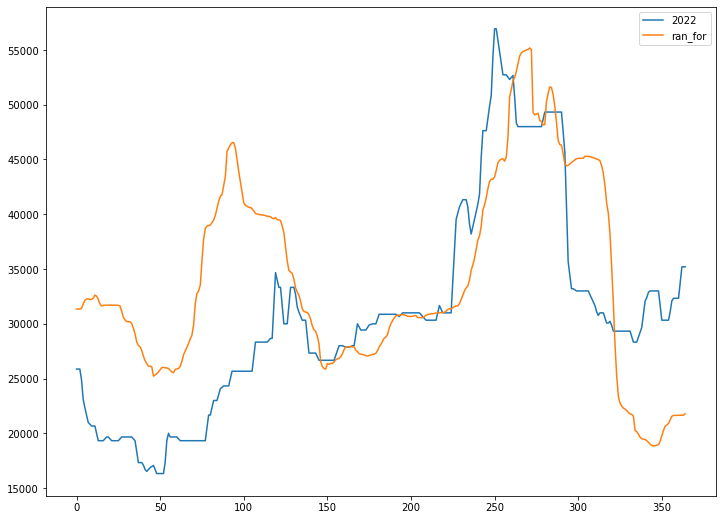

In [77]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
#plt.plot(i, label = 'past')
plt.plot(test_df, label = '2022')
plt.plot(pred_rf, label = 'ran_for')
plt.legend()
plt.show()

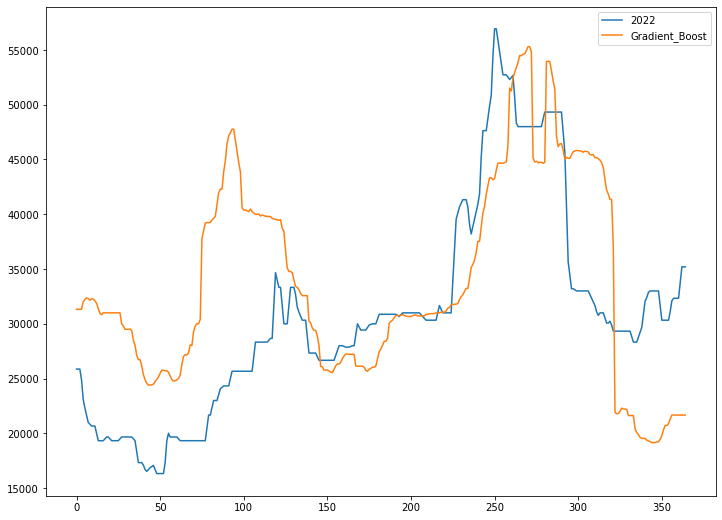

In [78]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
#plt.plot(i, label = 'past')
plt.plot(test_df, label = '2022')
plt.plot(pred_gb, label = 'Gradient_Boost')
plt.legend()
plt.show()

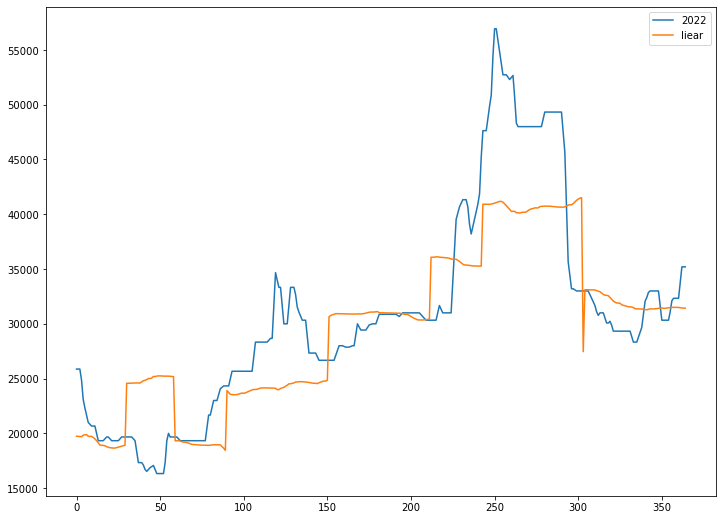

In [79]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
#plt.plot(i, label = 'past')
plt.plot(test_df, label = '2022')
plt.plot(pred_li, label = 'liear')
plt.legend()
plt.show()

In [122]:
pred_upper_het

0      21137.898145
1      21050.991386
2      21055.901712
3      20700.728751
4      20670.359907
           ...     
360    45549.292899
361    47549.187333
362    44580.393737
363    44413.994601
364    45709.928069
Name: yhat_upper, Length: 365, dtype: float64

In [129]:
pred_upper_het

0      21243.999047
1      21340.950395
2      21132.455341
3      21018.072207
4      21077.968260
           ...     
360    43310.897277
361    44330.428642
362    43081.095314
363    43575.263586
364    41897.916683
Name: yhat_upper, Length: 365, dtype: float64

In [494]:
test_df.head(30)

0     23330.0
1     23330.0
2     23330.0
3     22500.0
4     21670.0
5     21670.0
6     21670.0
7     21670.0
8     21670.0
9     21670.0
10    21670.0
11    21670.0
12    21000.0
13    20330.0
14    20330.0
15    20330.0
16    20330.0
17    20330.0
18    20330.0
19    20330.0
20    20330.0
21    20330.0
22    20330.0
23    20330.0
24    20330.0
25    20330.0
26    20330.0
27    20330.0
28    20330.0
29    20330.0
Name: 대구\n단위 (원), dtype: float64